# Graduate Rotational Internship Program (GRIP)

Name : Harish Seenivasan

Title : Exploratory Data Analysis- Retail

Level : Beginner

Batch : May

# Step 1: Data Collection

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the Dataset

In [2]:
data = pd.read_csv("SampleSuperstore.csv",encoding = 'latin1')
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data = data.drop(['Postal Code'],axis=1)

# Step 2 : Understanding the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [5]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.shape

(9994, 12)

In [7]:
data.columns.values

array(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'], dtype=object)

# Step 3: Checking Nulls

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Step 4: Data Visualization

HeatMap

<AxesSubplot:>

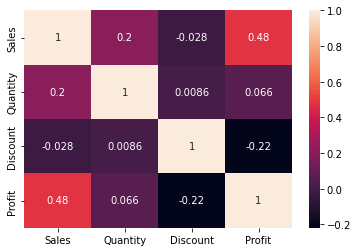

In [9]:
sns.heatmap(data.corr(),annot=True)

PairPlot

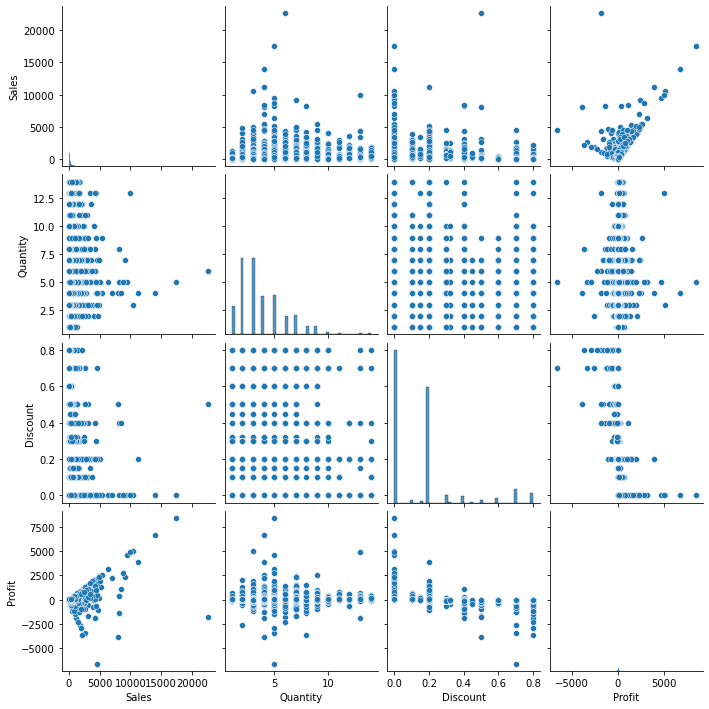

In [10]:
sns.pairplot(data)

Categories Present

C:\Users\Harish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


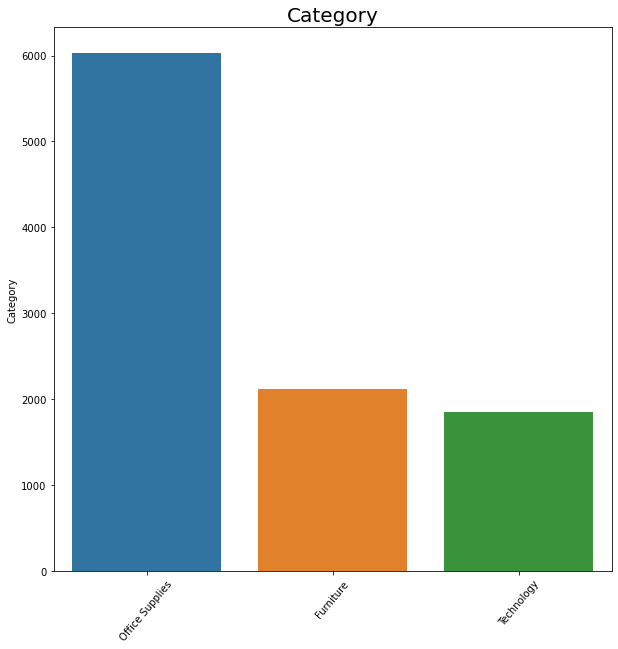

In [11]:
plt.subplots(figsize = (10,10))
sns.barplot(data['Category'].value_counts()[:10].index,data['Category'].value_counts()[:10])
plt.title('Category',fontsize = 20)
plt.xticks(rotation = 50)
plt.show()

In [12]:
#Total Sales
print("Total Sales are {}".format(data['Sales'].sum()))

#Total Profit
print("Total Profit are {}".format(data['Profit'].sum()))

Total Sales are 2297200.8603000003
Total Profit are 286397.0217


Profit and Sales by Region

In [13]:
z = data.groupby("Region")[['Profit','Sales']].sum()
z

,Profit,Sales
Region,,
Central,39706.3625,501239.8908
East,91522.7800,678781.2400
South,46749.4303,391721.9050
West,108418.4489,725457.8245


In [14]:
x = data.groupby("Category")[['Profit','Sales']].sum()
x

,Profit,Sales
Category,,
Furniture,18451.2728,741999.7953
Office Supplies,122490.8008,719047.0320
Technology,145454.9481,836154.0330


Profit and Sales by Category

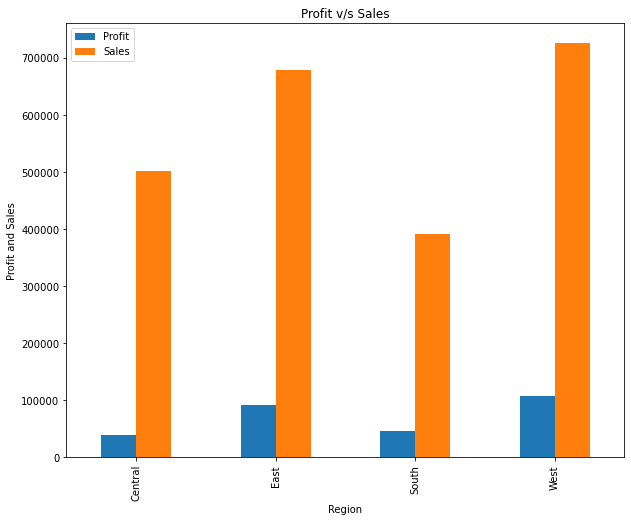

In [15]:
z.plot(kind="bar",figsize=(10,8))
plt.title("Profit v/s Sales")
plt.ylabel("Profit and Sales")
plt.show()

Profit per State

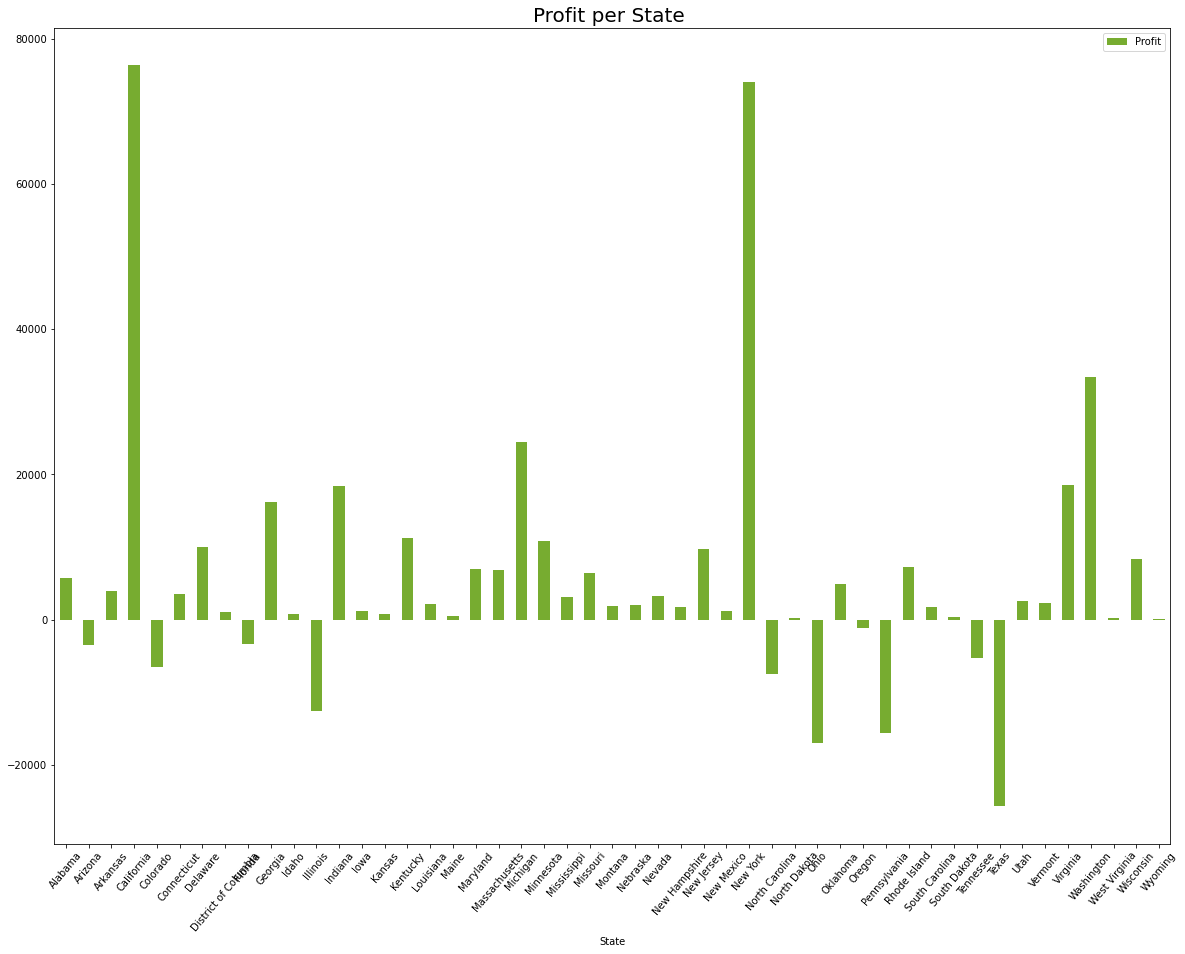

In [16]:
data[['State','Profit']].groupby(["State"],axis=0).sum().plot(kind='bar',figsize=(20,15),color='#77AC30')
plt.xticks(rotation=50)
plt.title("Profit per State ",fontsize=20)
plt.xlabel('State')
plt.show()

Total Sub-Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

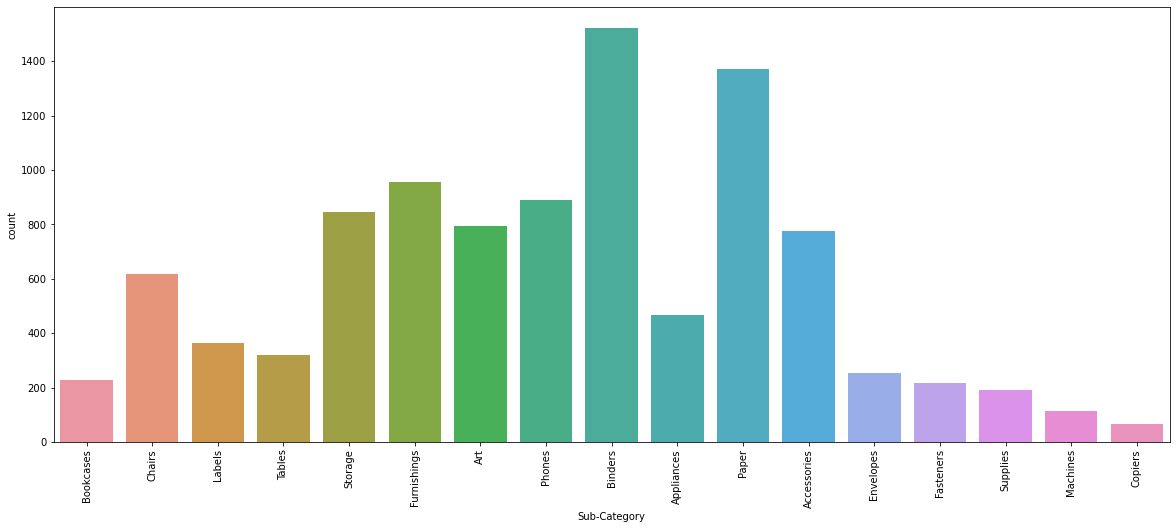

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)

Counting of cities by countplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'New York City'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Philadelphia'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Seattle'),
  Text(5, 0, 'Houston'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'Columbus'),
  Text(8, 0, 'San Diego'),
  Text(9, 0, 'Springfield'),
  Text(10, 0, 'Dallas'),
  Text(11, 0, 'Jacksonville'),
  Text(12, 0, 'Detroit'),
  Text(13, 0, 'Newark'),
  Text(14, 0, 'Richmond'),
  Text(15, 0, 'Jackson'),
  Text(16, 0, 'Columbia'),
  Text(17, 0, 'Aurora'),
  Text(18, 0, 'Phoenix'),
  Text(19, 0, 'Long Beach'),
  Text(20, 0, 'Arlington'),
  Text(21, 0, 'San Antonio'),
  Text(22, 0, 'Miami'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'Rochester'),
  Text(25, 0, 'Charlotte'),
  Text(26, 0, 'Henderson'),
  Text(27, 0, 'Lakewood'),
  Text(

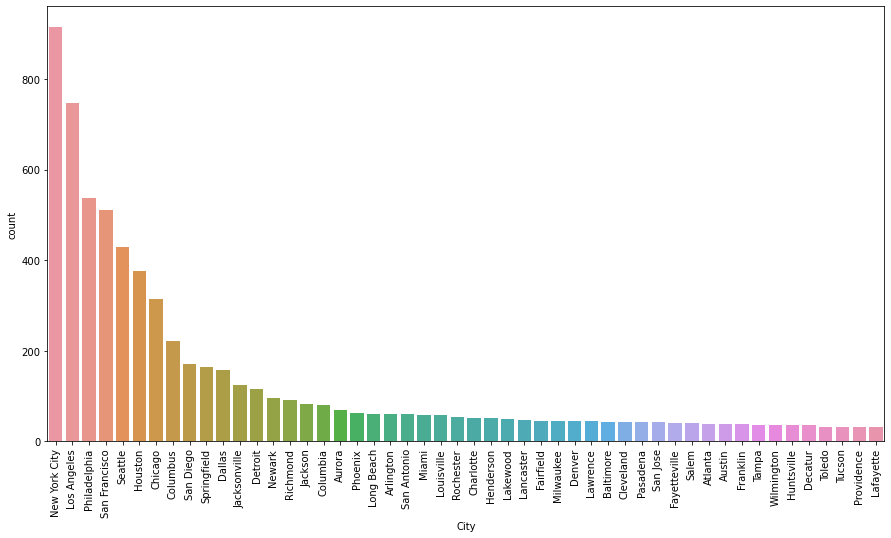

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['City'], order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

Sales by Region

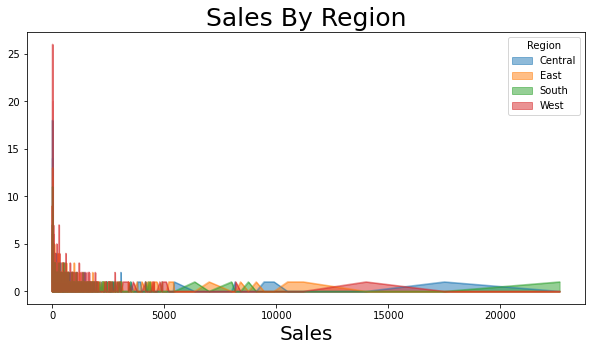

In [19]:
pd.crosstab(data['Sales'], data['Region']).plot(kind = 'area', stacked = False, figsize = (10,5))
plt.title('Sales By Region', fontsize = 25)
plt.xlabel("Sales", fontsize = 20)
plt.show()

In [20]:
Sales_per_country = data['City'].value_counts()[:10]
print(Sales_per_country)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64


Mode of Ship

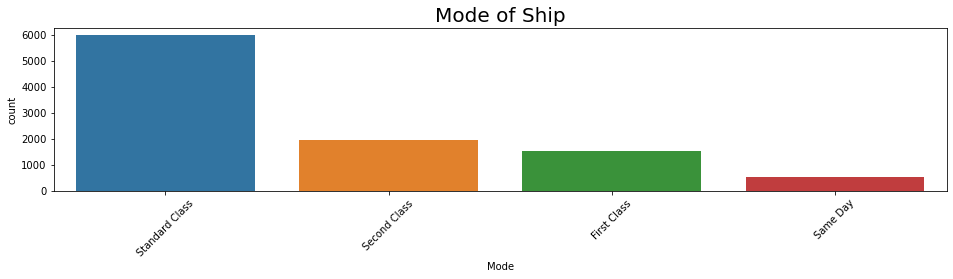

In [21]:
plt.figure(figsize=(16,3))
sns.countplot(x = data['Ship Mode'], order = data['Ship Mode'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Mode')
plt.title('Mode of Ship',fontsize=20)
plt.show()

Text(0, 0.5, 'Sales')

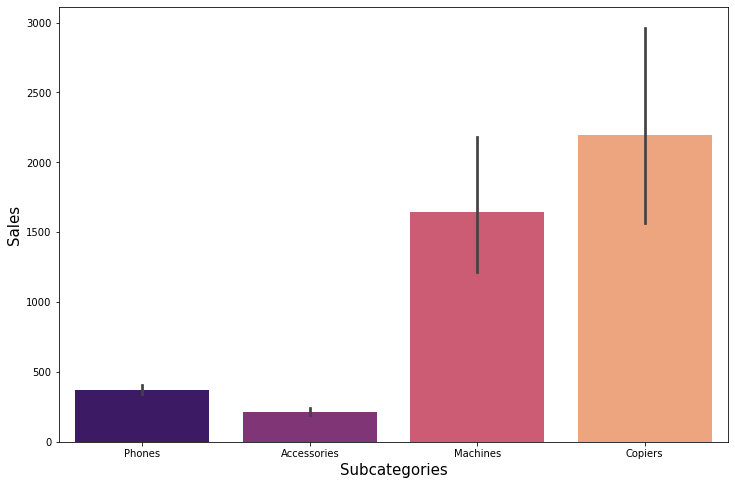

In [22]:
ds_tech=data[(data['Category']=="Technology")]
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

Relationship between profit and Discount

In [23]:
data['Discount'].corr(data['Profit'])

-0.21948745637176806

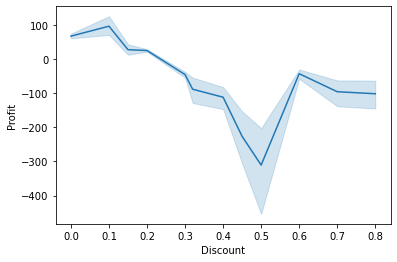

In [24]:
sns.lineplot(x="Discount",y="Profit",data=data)
plt.show()

# Conclusion and Results

Most used Category in Retail is Office Supplies

Highest Profit and Sales in the West Region

Highest Profit in California State

Most Saled Sub-Category is Binders

High position in ShipMode is of Standard Class

Most used Technology is Copiers